In [9]:
## Import library global
import pandas as pd
import numpy as np
import os

os.chdir("/content/drive/My Drive/tugas kuliah/TKI/artikel")

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
df = pd.read_csv('/content/drive/My Drive/tugas kuliah/TKI/tugas6/cluster.csv', encoding="ISO-8859-1")
df.head()

,ID,CLASS,ABSTRACT
0,D001,HSO,Multiple sequence alignment (MSA) is a central...
1,D002,HSO,Although the heuristic search algorithm A* is ...
2,D003,HSO,The increased demand for distributed computati...
3,D004,HSO,Declarative logic programs (LP) based on the w...
4,D005,HSO,Recent years have witnessed the success of has...


In [11]:
class_list = df['CLASS']
class_list.value_counts()

Machine Learning            49
Multiagent Systems          31
Other                       25
Knowledge                   22
HSO                         14
NLP                          8
Multidisciplinary Topics     1
Name: CLASS, dtype: int64

In [14]:
with open('/content/drive/My Drive/tugas kuliah/TKI/tugas6/stopwords.txt', "r") as f:
  stopwords = f.read()

  print(stopwords)

"a, about, above, across, after, again, against, all, almost, alone, along, already, also, although, always, am, among, an, and, another, any, anybody, anyone, anything, anywhere, are, area, areas, aren't, around, as, ask, asked, asking, asks, at, away, b, back, backed, backing, backs, be, became, because, become, becomes, been, before, began, behind, being, beings, below, best, better, between, big, both, but, by, c, came, can, cannot, can't, case, cases, certain, certainly, clear, clearly, come, could, couldn't, d, did, didn't, differ, different, differently, do, does, doesn't, doing, done, don't, down, downed, downing, downs, during, e, each, early, either, end, ended, ending, ends, enough, even, evenly, ever, every, everybody, everyone, everything, everywhere, f, face, faces, fact, facts, far, felt, few, find, finds, first, for, four, from, full, fully, further, furthered, furthering, furthers, g, gave, general, generally, get, gets, give, given, gives, go, going, good, goods, got,

In [15]:
import re
import string

def preprocess_text(x):
  x = x.lower()
  x = x.encode('ascii', 'ignore').decode()
  x = ' '.join([i for i in x.split() if i not in stopwords])
  x = re.sub('\n', ' ', x)
  x = re.sub("[%s]" % re.escape(string.punctuation), ' ', x)
  x = re.sub("\d+", " ", x)
  x = re.sub("\s{2,}", " ", x)
  return x

df['clean_abstract'] = df['ABSTRACT'].apply(preprocess_text)
df.head()

,ID,CLASS,ABSTRACT,clean_abstract
0,D001,HSO,Multiple sequence alignment (MSA) is a central...,multiple sequence alignment msa central comput...
1,D002,HSO,Although the heuristic search algorithm A* is ...,heuristic search algorithm a well known optima...
2,D003,HSO,The increased demand for distributed computati...,increased demand distributed computations data...
3,D004,HSO,Declarative logic programs (LP) based on the w...,declarative logic programs lp based well found...
4,D005,HSO,Recent years have witnessed the success of has...,recent witnessed success hashing techniques ap...


In [16]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['clean_abstract'])
df_new = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
print(df_new.shape)
df_new.head()

(150, 3271)


,aam,abduction,abilities,ability,able,abs,absent,absorb,abstract,abstraction,accelerated,accelerates,access,accommodate,accommodates,accomplish,accomplished,according,account,accounts,accumulate,accuracy,accurate,accurately,achievable,achieve,achieved,achievement,achieves,achieving,acquire,acquires,acquisition,action,actions,active,actively,activities,activity,actual,...,well,wellknown,wfs,wggs,whenever,whereby,which,whom,wide,widely,widespread,width,will,willingness,winner,winners,winning,wise,wishes,with,witnessed,word,wordnet,words,workers,workflow,workflows,world,worlds,worst,wr,wsat,xsb,years,yes,yield,yielding,yields,zilberstein,zilbersteins
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


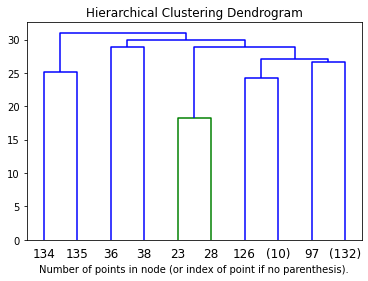

In [19]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(df_new.values)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=4)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [20]:
print(df['clean_abstract'][23])
print("-"*50)
print(df['clean_abstract'][28])

planning notoriously difficult computational worst case complexity researchers investing significant efforts develop heuristics restrictions planning practically feasible case based planning heuristic approaches tries reuse previous experience solving similar avoid planning effort empirical indicates despite store retrieve experiences case based planning compete traditional generative planning paper provide theoretical results identify situations case based approach provably tractable perform analysis framework parameterized complexity supports rigorous worst case complexity analysis takes structural properties input account terms parameters central notion parameterized complexity fixed parameter tractability extends classical notion polynomial time tractability utilising affect parameters draw detailed map parameterized complexity landscape variants arise context case based planning particular consider reusing existing plan imposing various restrictions terms parameters steps added ex

In [21]:
print(df['clean_abstract'][126])
print("-"*50)
print(df['clean_abstract'][10])

course decade infrared ir particularly thermal imaging based recognition emerged promising complement conventional visible spectrum based approaches continue struggle applied world inherently insensitive visible spectrum illumination changes images introduce specific challenges notably sensitivity factors affect facial heat emission patterns e g emotional ambient temperature alcohol intake addition facial expression pose changes difficult correct images rich frequency detail cue fitting deformable model paper describe novel method addresses major challenges specifically normalize pose facial expression changes generate synthetic frontal image canonical neutral facial expression image arbitrary pose facial expression achieved piecewise affine warping follows active appearance model aam fitting publication explores aam thermal images propose pre processing step enhances detail thermal images aam convergence faster accurate overcome thermal image sensitivity exact pattern facial temperatu

In [22]:
print(df['clean_abstract'][134])
print("-"*50)
print(df['clean_abstract'][135])

stochastic local search sls algorithms ability efficiently models randomly generated instances boolean satisfiablity sat problem famous sls algorithms sat walksat initial algorithm wide influence modern sls algorithms recently increasing walksat due discovery power random sat instances performance walksat random k sat instances k lags behind indeed improving sls algorithms instances takes step towards direction propose novel concept namely multilevel make based concept design scoring function called linear make utilized break ties walksat leading algorithm called walksat lm experimental results random sat sat instances walksat lm improves walksat magnitudes moreover walksat lm significantly outperforms state of the art sls solvers random sat instances competes random sat ones additionally walksat lm performs random instances sat challenge indicating robustness 
--------------------------------------------------
stochastic local search sls dominant algorithmic paradigm incomplete sat ma

In [ ]:
purity = 